In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

Load Data

In [12]:
def get_label_from_image_name(image_name):
    value = image_name.split(".")[0]
    label = re.sub("\d+", "", value)
    if label == "Angry":
      return 0
    elif label == "Disgust":
      return 1
    elif label == "Fear":
      return 2
    elif label == "Happiness":
      return 3
    elif label == "Sadness":
      return 4
    elif label == "Surprise":
      return 5
    return -1

def predicted_class(index):
  if index == 0:
    return "angry"
  elif index == 1:
    return "disgust"
  elif index == 2:
    return "fear"
  elif index == 3:
    return "happiness"
  elif index == 4:
    return "sadness"
  elif index == 5:
    return "surprise"
  return -1

def totalLengthImages(): # Toplam fotoğraf sayısını return ediyor.
  total = 0
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    total += len(image_list)
  return total

BU PROCESS SADECE RGB RENKLERİNİ ÖN İŞLEMEK İÇİN TASARLANMIŞTIR.

In [13]:
def process():
  
  image_size = (32,32)
  num_images = totalLengthImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3, *image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  # Klasördeki resimlerin listesini alın ve ilk 100'ünü seçin (test amaçlı).
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [14]:
def process2():
  
  image_size = (32,32)
  num_images = totalLengthImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3,*image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  # Klasördeki resimlerin listesini alın ve ilk 100'ünü seçin (test amaçlı).
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            if img.mode == "RGB":
              img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
            elif img.mode == "L":
              img = np.array(img)[:, :, np.newaxis]
              img = np.repeat(img, 3, axis=2)
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [15]:
def totalLengthTestImages(): # Toplam fotoğraf sayısını return ediyor. 600
  total = 0
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/test/{emotion}/"
    image_list = os.listdir(path)
    total += len(image_list)
  return total

In [16]:
def getTestValues():
  image_size = (32,32)
  num_images = totalLengthTestImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3,*image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/test/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            if img.mode == "RGB":
              img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
            elif img.mode == "L":
              img = np.array(img)[:, :, np.newaxis]
              img = np.repeat(img, 3, axis=2)
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [17]:
X,y = process2()

1000
2000
3000
4000
5000
6000


In [18]:
test_X, test_Y = getTestValues()

100
200
300
400
500
600


In [19]:
classes = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

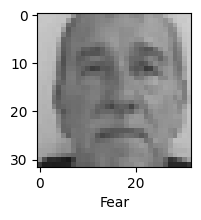

In [21]:
plot_sample(X, y, 2500)

In [22]:
# from sklearn.model_selection import train_test_split  
# X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3, 3), stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(2304, 64)  # Giriş boyutu, Flatten sonrası boyuttan bağımsızdır.
        # self.fc1 = nn.Linear(1600, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 6)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# X ve y verilerini PyTorch Tensor'larına dönüştürme işlemi
# X = torch.from_numpy(X).float()
X = torch.from_numpy(X).permute(0, 3, 1, 2).float()
y = torch.from_numpy(y).long()

# Eğitim döngüsü
for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{20}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 1.7918
Epoch 2/20, Loss: 1.7908
Epoch 3/20, Loss: 1.7896
Epoch 4/20, Loss: 1.7883
Epoch 5/20, Loss: 1.7863
Epoch 6/20, Loss: 1.7838
Epoch 7/20, Loss: 1.7807
Epoch 8/20, Loss: 1.7768
Epoch 9/20, Loss: 1.7721
Epoch 10/20, Loss: 1.7664
Epoch 11/20, Loss: 1.7598
Epoch 12/20, Loss: 1.7526
Epoch 13/20, Loss: 1.7453
Epoch 14/20, Loss: 1.7381
Epoch 15/20, Loss: 1.7309
Epoch 16/20, Loss: 1.7242
Epoch 17/20, Loss: 1.7179
Epoch 18/20, Loss: 1.7114
Epoch 19/20, Loss: 1.7044
Epoch 20/20, Loss: 1.6975


In [24]:
pytorch_predictions = []
# Test verilerini hazırlama
test_X = torch.from_numpy(test_X).permute(0, 3, 1, 2).float()
# Modeli değerlendirme moduna geçirme
model.eval()
# Giriş verilerini modelden geçirme
with torch.no_grad():
    outputs = model(test_X)

# Tahminleri almak
_, predictions = torch.max(outputs, 1)

# Tahmin sonuçlarını kullanma
for i in range(len(predictions)):
    print(f"Görüntü {i+1} için tahmin: {predictions[i]}")
    pytorch_predictions.append(predictions[i])

Görüntü 1 için tahmin: 5
Görüntü 2 için tahmin: 2
Görüntü 3 için tahmin: 5
Görüntü 4 için tahmin: 2
Görüntü 5 için tahmin: 0
Görüntü 6 için tahmin: 5
Görüntü 7 için tahmin: 3
Görüntü 8 için tahmin: 0
Görüntü 9 için tahmin: 2
Görüntü 10 için tahmin: 0
Görüntü 11 için tahmin: 3
Görüntü 12 için tahmin: 5
Görüntü 13 için tahmin: 5
Görüntü 14 için tahmin: 0
Görüntü 15 için tahmin: 0
Görüntü 16 için tahmin: 0
Görüntü 17 için tahmin: 5
Görüntü 18 için tahmin: 0
Görüntü 19 için tahmin: 5
Görüntü 20 için tahmin: 3
Görüntü 21 için tahmin: 2
Görüntü 22 için tahmin: 0
Görüntü 23 için tahmin: 2
Görüntü 24 için tahmin: 5
Görüntü 25 için tahmin: 0
Görüntü 26 için tahmin: 5
Görüntü 27 için tahmin: 5
Görüntü 28 için tahmin: 3
Görüntü 29 için tahmin: 0
Görüntü 30 için tahmin: 4
Görüntü 31 için tahmin: 5
Görüntü 32 için tahmin: 5
Görüntü 33 için tahmin: 0
Görüntü 34 için tahmin: 3
Görüntü 35 için tahmin: 5
Görüntü 36 için tahmin: 5
Görüntü 37 için tahmin: 0
Görüntü 38 için tahmin: 5
Görüntü 39 için tahmi

In [25]:
len(pytorch_predictions)

600

In [26]:
test_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [27]:
true = 0
for i in range(len(test_Y)):
  real = test_Y[i]
  prediction = pytorch_predictions[i]
  if real == prediction:
    true += 1
true

172

angry     -> 0
disgust   -> 1
fear      -> 2
happiness -> 3
sadness   -> 4
surprise  -> 5